## Companies valuation (valuation computation, balance sheet driven)(math)

In [3]:
import requests 
import pandas as pd

import requests

demo= '31853220bc5708a36155ca7f0481a5e0'

companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=100&apikey={demo}')
companies = companies.json()
technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])

print(technological_companies)

['AAPL', 'MSF.BR', 'MSFT', 'TSM', 'NVDA', 'INCO.BR', 'INTC', 'ASML', 'ADBE', 'CRM', 'CIS.BR', 'CSCO', 'ASML.AS', 'AVGO', 'QCOM', 'SHOP.TO', 'ORCL', 'ACN', 'TXN', 'SAP', 'SHOP', 'SNE', 'IBMA.BR', 'IBM', 'AMD', 'SQ', 'UBER', 'NOW', 'INTU']


In [11]:
pricetosales = {}
for item in technological_companies:
    try:
      #annual income statement since we need anual sales
      IS = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{item}?apikey={demo}')
      IS = IS.json()
      print(IS)
      Revenue = IS[0]['revenue']
      grossprofitratip = IS[0]['grossProfitRatio']
      #most recent market capitliazation
      MarketCapit = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{item}?apikey={demo}')
      MarketCapit = MarketCapit.json()
      MarketCapit = MarketCapit[0]['marketCap']

      #Price to sales
      p_to_sales = MarketCapit/Revenue

      pricetosales[item] = {}
      pricetosales[item]['revenue'] = Revenue
      pricetosales[item]['Gross_Profit_ratio'] = grossprofitratip
      pricetosales[item]['price_to_sales'] = p_to_sales
      pricetosales[item]['Market_Capit'] = MarketCapit
    except:
      pass
print(pricetosales)

[{'date': '2020-09-26', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'fillingDate': '2020-10-30', 'acceptedDate': '2020-10-29 18:06:25', 'period': 'FY', 'revenue': 274515000000, 'costOfRevenue': 169559000000, 'grossProfit': 104956000000, 'grossProfitRatio': 0.382332477278109, 'researchAndDevelopmentExpenses': 18752000000, 'generalAndAdministrativeExpenses': 19916000000, 'sellingAndMarketingExpenses': 0.0, 'otherExpenses': -87000000, 'operatingExpenses': 38668000000, 'costAndExpenses': 208227000000, 'interestExpense': 2873000000, 'depreciationAndAmortization': 11056000000, 'ebitda': 81020000000, 'ebitdaratio': 0.295138699160337, 'operatingIncome': 66288000000, 'operatingIncomeRatio': 0.244398302460703, 'totalOtherIncomeExpensesNet': -87000000, 'incomeBeforeTax': 67091000000, 'incomeBeforeTaxRatio': 0.244398302460703, 'incomeTaxExpense': 9680000000, 'netIncome': 57411000000, 'netIncomeRatio': 0.209136112780722, 'eps': 3.36, 'epsdiluted': 3.36, 'weightedAverageShsOut': 17057622000, 'weigh

In [12]:
pricetosales["SNE"]["revenue"]=pricetosales["SNE"]["revenue"]/100

In [13]:
pricetosales["SNE"]

{'revenue': 86656870000.0,
 'Gross_Profit_ratio': 0.2772418389909536,
 'price_to_sales': 0.014981380796467724,
 'Market_Capit': 129823956810}

In [14]:
pricetosales["TSM"]["revenue"]=pricetosales["TSM"]["revenue"]/28

In [15]:
pricetosales["TSM"]

{'revenue': 38213885714.28571,
 'Gross_Profit_ratio': 0.46047388533412686,
 'price_to_sales': 0.5778900129421916,
 'Market_Capit': 618335841480}

In [16]:
IS

[{'date': '2020-07-31',
  'symbol': 'INTU',
  'reportedCurrency': 'USD',
  'fillingDate': '2020-08-31',
  'acceptedDate': '2020-08-31 16:31:44',
  'period': 'FY',
  'revenue': 7679000000,
  'costOfRevenue': 1378000000,
  'grossProfit': 6301000000,
  'grossProfitRatio': 0.8205495507227504,
  'researchAndDevelopmentExpenses': 1392000000,
  'generalAndAdministrativeExpenses': 2727000000,
  'sellingAndMarketingExpenses': 2048000000,
  'otherExpenses': -3000000.0,
  'operatingExpenses': 4125000000,
  'costAndExpenses': 5503000000,
  'interestExpense': 14000000,
  'depreciationAndAmortization': 6000000.0,
  'ebitda': 2430000000,
  'ebitdaratio': 0.3164474540955854,
  'operatingIncome': 2176000000,
  'operatingIncomeRatio': 0.2862351868732908,
  'totalOtherIncomeExpensesNet': -3000000.0,
  'incomeBeforeTax': 2198000000,
  'incomeBeforeTaxRatio': 0.2862351868732908,
  'incomeTaxExpense': 372000000,
  'netIncome': 1826000000,
  'netIncomeRatio': 0.23779137908581846,
  'eps': 6.99,
  'epsdiluted

In [17]:
price_to_sales_df = pd.DataFrame.from_dict(pricetosales, orient='index')


In [18]:
price_to_sales_df['ps_average_sector'] = price_to_sales_df['price_to_sales'].mean()
price_to_sales_df['pscompany_vs_averagesector'] = price_to_sales_df['price_to_sales'] - price_to_sales_df['ps_average_sector']
price_to_sales_df['price_as_per_average_industryPS'] = price_to_sales_df['ps_average_sector'] * price_to_sales_df['revenue']
price_to_sales_df['price_difference'] = price_to_sales_df['price_as_per_average_industryPS'] - price_to_sales_df['Market_Capit']

In [19]:
price_to_sales_df

,revenue,Gross_Profit_ratio,price_to_sales,Market_Capit,ps_average_sector,pscompany_vs_averagesector,price_as_per_average_industryPS,price_difference
AAPL,2.745150e+11,0.382332,8.227988,2.258706e+12,14.541941,-6.313954,3.991981e+12,1.733275e+12
MSFT,1.430150e+11,0.677810,11.552554,1.652189e+12,14.541941,-2.989387,2.079716e+12,4.275272e+11
TSM,3.821389e+10,0.460474,0.577890,6.183358e+11,14.541941,-13.964051,5.557041e+11,-6.263176e+10
NVDA,1.091800e+10,0.619894,31.034532,3.388350e+11,14.541941,16.492591,1.587689e+11,-1.800661e+11
INTC,7.196500e+10,0.585562,3.378303,2.431196e+11,14.541941,-11.163639,1.046511e+12,8.033913e+11
ADBE,1.117130e+10,0.850266,20.493972,2.289442e+11,14.541941,5.952031,1.624523e+11,-6.649191e+10
CRM,1.709800e+10,0.752310,11.982163,2.048710e+11,14.541941,-2.559778,2.486381e+11,4.376709e+10
CSCO,4.930100e+10,0.642644,3.902905,1.924171e+11,14.541941,-10.639036,7.169322e+11,5.245151e+11
ASML.AS,1.182000e+10,0.446684,14.982322,1.770910e+11,14.541941,0.440381,1.718857e+11,-5.205299e+09
AVGO,2.388800e+10,0.565807,7.970974,1.904106e+11,14.541941,-6.570968,3.473779e+11,1.569673e+11


<AxesSubplot:>

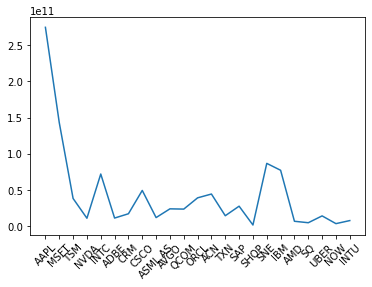

In [26]:
price_to_sales_df.revenue.plot(rot=45, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,])


#Do do if we want plot

##Made a list of number like this:
#loc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,]

#and then put that into the plot,
#price_to_sales_df.revenue.plot(rot=45, xticks=loc)

In [21]:
price_to_sales_df.index.tolist()

['AAPL',
 'MSFT',
 'TSM',
 'NVDA',
 'INTC',
 'ADBE',
 'CRM',
 'CSCO',
 'ASML.AS',
 'AVGO',
 'QCOM',
 'ORCL',
 'ACN',
 'TXN',
 'SAP',
 'SHOP',
 'SNE',
 'IBM',
 'AMD',
 'SQ',
 'UBER',
 'NOW',
 'INTU']

### Company Valuation base on the balance sheet